In [20]:
from neuroml import NeuroMLDocument
import neuroml.writers as writers
from neuroml.utils import component_factory
from neuroml.utils import validate_neuroml2
from pyneuroml import pynml
from pyneuroml.lems import LEMSSimulation
import numpy as np

In [21]:
nml_doc = component_factory(NeuroMLDocument, id="IzhSingleNeuron")

izh0 = nml_doc.add(
    "Izhikevich2007Cell",
    id="izh2007RS0", v0="-60mV", C="100pF", k="0.7nS_per_mV", vr="-60mV",
    vt="-40mV", vpeak="35mV", a="0.03per_ms", b="-2nS", c="-50.0mV", d="100pA")

net = nml_doc.add("Network", id="IzNet", validate=False)

size0 = 1
pop0 = net.add("Population", id="IzhPop0", component=izh0.id, size=size0)

pg = nml_doc.add(
    "PulseGenerator",
    id="pulseGen_%i" % 0, delay="0ms", duration="1000ms",
    amplitude="0.07 nA"
)
exp_input = net.add("ExplicitInput", target="%s[%i]" % (pop0.id, 0), input=pg.id)


nml_file = 'izhikevich2007_single_cell_network.nml'
writers.NeuroMLWriter.write(nml_doc, nml_file)
print("Written network file to: " + nml_file)


simulation_id = "example-single-izhikevich2007cell-sim"
simulation = LEMSSimulation(sim_id=simulation_id,
                            duration=1000, dt=0.1, simulation_seed=123)
simulation.assign_simulation_target(net.id)
simulation.include_neuroml2_file(nml_file)

simulation.create_output_file(
    "output0", "%s.v.dat" % simulation_id
)
simulation.add_column_to_output_file("output0", 'IzhPop0[0]', 'IzhPop0[0]/v')


lems_simulation_file = simulation.save_to_file()
with open(lems_simulation_file) as f: 
   print(f.read())
   
   

pynml.run_lems_with_jneuroml(
    lems_simulation_file, max_memory="2G", nogui=True, plot=False
)

/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulator-processes-9grspSIZ-py3.11/lib/python3.11/site-packages/neuroml/nml/generatedssupersuper.py:160: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  logger.warn("Build time validation is disabled.")
libNeuroML >>> WARNING - Build time validation is disabled.
/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulator-processes-9grspSIZ-py3.11/lib/python3.11/site-packages/neuroml/nml/generatedssupersuper.py:101: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  logger.warn("Build time validation is disabled.")
libNeuroML >>> WARNING - Build time validation is disabled.
libNeuroML >>> INFO - Loading NeuroML2 file: /Users/alex/Desktop/uchc_work/biosimulators-2.0/biosimulator-processes/demos/izhikevich2007_single_cell_network.nml
libNeuroML >>> INFO - Writing LEMS Simulation example-single-izhikevich2007cell-sim to file: LEMS_example-single-izhikevich2007cell-sim.xml...
libNeuro

Written network file to: izhikevich2007_single_cell_network.nml
<Lems>

    <!-- 

        This LEMS file has been automatically generated using PyNeuroML v1.3.0 (libNeuroML v0.6.1)

     -->

    <!-- Specify which component to run -->
    <Target component="example-single-izhikevich2007cell-sim"/>

    <!-- Include core NeuroML2 ComponentType definitions -->
    <Include file="Cells.xml"/>
    <Include file="Networks.xml"/>
    <Include file="Simulation.xml"/>

    <Include file="izhikevich2007_single_cell_network.nml"/>

    <Simulation id="example-single-izhikevich2007cell-sim" length="1000.0ms" step="0.1ms" target="IzNet" seed="123">  <!-- Note seed: ensures same random numbers used every run -->
        <OutputFile id="output0" fileName="example-single-izhikevich2007cell-sim.v.dat">
            <OutputColumn id="IzhPop0[0]" quantity="IzhPop0[0]/v"/>
        </OutputFile>

    </Simulation>

</Lems>



libNeuroML >>> INFO - Command completed successfully!


True

libNeuroML >>> INFO - Generating plot: Membrane potential
libNeuroML >>> INFO - Saving image to /Users/alex/Desktop/uchc_work/biosimulators-2.0/biosimulator-processes/demos/SingleNeuron.png of plot: Membrane potential
libNeuroML >>> INFO - Saved image to SingleNeuron.png of plot: Membrane potential


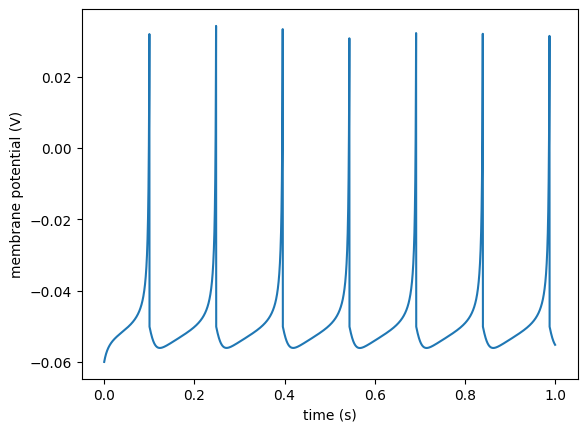

<Axes: xlabel='time (s)', ylabel='membrane potential (V)'>

In [22]:
# Load the data from the file and plot the graph for the membrane potential
# using the pynml generate_plot utility function.
data_array = np.loadtxt("%s.v.dat" % simulation_id)
pynml.generate_plot(
    [data_array[:, 0]], [data_array[:, 1]],
    "Membrane potential", show_plot_already=True,
    xaxis="time (s)", yaxis="membrane potential (V)",
    save_figure_to="SingleNeuron.png"
    
)

In [1]:
from biosimulator_processes.steps.neuron_network import SimpleNeuronNetwork
from biosimulator_processes import CORE
import os

Smoldyn is not properly installed in this environment and thus its process implementation cannot be registered. Please consult smoldyn documentation.
Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra-process',
  'copasi-process',
  'tellurium-process',
  'utc-amici',
  'utc-copasi',
  'utc-tellurium',
  'copasi-step',
  'tellurium-step',
  'amici-step',
  'plotter',
  'plotter2d',
  'utc-comparator',
  'simple-neuron-network']


In [2]:
"""
config_schema = {
        'num_neurons': 'integer',
        'doc_config': {
            'doc_name': 'string',
            'doc_id': 'string',
            'model_name': 'string',
            'model_id': 'string',
            'param_config': 'tree[string]'
        },
        'synapse_config': 'tree[string]',  # {'synapse_name': {synapse_id: '', synapse_params: {}}}
        'network_config': {
            'network_id': 'string',
            'validate': {
                '_type': 'boolean',
                '_default': False
            },
            'population_config': 'tree'  # {population_id: {size: 5, property_config: {tag: str, value: str} <-- optional}}
        }
    }
"""

"\nconfig_schema = {\n        'num_neurons': 'integer',\n        'doc_config': {\n            'doc_name': 'string',\n            'doc_id': 'string',\n            'model_name': 'string',\n            'model_id': 'string',\n            'param_config': 'tree[string]'\n        },\n        'synapse_config': 'tree[string]',  # {'synapse_name': {synapse_id: '', synapse_params: {}}}\n        'network_config': {\n            'network_id': 'string',\n            'validate': {\n                '_type': 'boolean',\n                '_default': False\n            },\n            'population_config': 'tree'  # {population_id: {size: 5, property_config: {tag: str, value: str} <-- optional}}\n        }\n    }\n"

In [3]:
network = SimpleNeuronNetwork(
    config={
        'num_neurons': 2,
        'doc_config': {
            'doc_name': "NeuroMLDocument",
            'doc_id': "IzNet",
            'model_name': "Izhikevich2007Cell",
            'model_id': "iz2007RS0",
            'param_config': {
                'v0': "-60mV",
                'C': "100pF",
                'k': "0.7nS_per_mV",
                'vr': "-60mV",
                'vt': "-40mV",
                'vpeak': "35mV",
                'a': "0.03per_ms",
                'b': "-2nS",
                'c': "-50.0mV",
                'd': "100pA"  
            },
        },
        'synapse_config': {
            "ExpOneSynapse": {
                'synapse_id': "syn0",
                'synapse_params': {
                    'erev': "0mV",
                    'gbase': "65nS",
                    'tau_decay': "3ms"
                }
            }
        },
        'network_config': {
            'network_id': "IzNet",
            'population_config': {
                "IzPop0": {
                    'size': 5,
                    'property_config': {
                        'tag': "color",
                        'value': "0 0 .8"
                    }
                },
                "IzPop1": {
                    'size': 5,
                    'property_config': {
                        'tag': "color",
                        'value': "0 0 .8"
                    }
                }
            }
        },
        'save_dir': os.getcwd()
    }, 
    core=CORE
)

libNeuroML >>> WARNING - Build time validation is disabled.
libNeuroML >>> WARNING - Build time validation is disabled.
libNeuroML >>> INFO - Executing: (java -Xmx400M  -jar  "/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulator-processes-9grspSIZ-py3.11/lib/python3.11/site-packages/pyneuroml/utils/./../lib/jNeuroML-0.13.1-jar-with-dependencies.jar" -validate /Users/alex/Desktop/uchc_work/biosimulators-2.0/biosimulator-processes/demos/iz2007RS0.nml ) in directory: .


Izhikevich2007Cell -- Cell based on the modified Izhikevich model in Izhikevich 2007, Dynamical systems in neuroscience, MIT Press

NeuroMLv2 schema documentation: https://docs.neuroml.org/Userdocs/Schemas/Index.html?highlight=izhikevich2007Cell#izhikevich2007cell for more information.

Valid members for Izhikevich2007Cell are:
* properties (class: Property, Optional)
* vr (class: Nml2Quantity_voltage, Required)
	* Contents ('ids'/<objects>): -60mV

* b (class: Nml2Quantity_conductance, Required)
	* Contents ('ids'/<objects>): -2nS

* C (class: Nml2Quantity_capacitance, Required)
	* Contents ('ids'/<objects>): 100pF

* a (class: Nml2Quantity_pertime, Required)
	* Contents ('ids'/<objects>): 0.03per_ms

* notes (class: xs:string, Optional)
* annotation (class: Annotation, Optional)
* id (class: NmlId, Required)
	* Contents ('ids'/<objects>): iz2007RS0

* vt (class: Nml2Quantity_voltage, Required)
	* Contents ('ids'/<objects>): -40mV

* c (class: Nml2Quantity_voltage, Required)
	* Conten

libNeuroML >>> INFO - Command completed successfully!
libNeuroML >>> INFO - Output: 
  jNeuroML >>   jNeuroML v0.13.1
  jNeuroML >>  Validating: /Users/alex/Desktop/uchc_work/biosimulators-2.0/biosimulator-processes/demos/iz2007RS0.nml
  jNeuroML >>  Valid against schema and all tests
  jNeuroML >>  No warnings
  jNeuroML >>  
  jNeuroML >>  Validated 1 files: All valid and no warnings
  jNeuroML >>  
  jNeuroML >>  


In [5]:
!cat iz2007RS0.nml

<neuroml xmlns="http://www.neuroml.org/schema/neuroml2"  xmlns:xs="http://www.w3.org/2001/XMLSchema" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.neuroml.org/schema/neuroml2 https://raw.github.com/NeuroML/NeuroML2/development/Schemas/NeuroML2/NeuroML_v2.3.1.xsd" id="IzNet">
    <expOneSynapse id="syn0" gbase="65nS" erev="0mV" tauDecay="3ms"/>
    <izhikevich2007Cell id="iz2007RS0" C="100pF" v0="-60mV" k="0.7nS_per_mV" vr="-60mV" vt="-40mV" vpeak="35mV" a="0.03per_ms" b="-2nS" c="-50.0mV" d="100pA"/>
    <network id="IzNet">
        <population id="IzPop0" component="iz2007RS0" size="5">
            <property tag="color" value="0 0 .8"/>
        </population>
        <population id="IzPop1" component="iz2007RS0" size="5">
            <property tag="color" value="0 0 .8"/>
        </population>
    </network>
</neuroml>


In [4]:
network.outputs()

{'synapses': 'tree', 'network': 'tree'}

In [5]:
network.update({})

{'synapses': {'synapse_0': <neuroml.nml.nml.ExpOneSynapse at 0x32f90ab90>},
 'network': <neuroml.nml.nml.Network at 0x32fa7b850>}

In [10]:
x = {'a': [1, 2], 'b': [3, 4]}

x[1]

KeyError: 1